# Pandas: Series, Data Frames and Time Series

Pandas is -similar to NumPy- another library offering high-level data structures, which enable fast data analyzis. For us, the most important are probably the types `Series` and `DataFrame`, both of which are introduced in the following.  

This tutorial is based on the [intro to Pandas:](http://pandas.pydata.org/pandas-docs/stable/10min.html)

# TOC

- Pandas
  - Loading and reading data
  - Series
    - 1 dimensional data structure
  - DataFrame
    - 2 dimensional data structure
    - `pandas.DataFrame( data, index, columns, dtype, copy)`
    - columns can be of different types
    - data can be lists, dicts, maps, ndarrays.

## Initialising`pandas`,`numpy` and `matplotlib`

In [1]:
%pylab inline 
# %pylab is a magic function in ipython, and triggers the import of various modules within Matplotlib

Populating the interactive namespace from numpy and matplotlib


#### Above magic function equals
```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
```
Magic function: `%matplotlib inline` is to show plots directly below code as part of the notebook.


## Pandas vs Numpy
1. In pandas we have 1D Series and 2D DataFrame in numpy we have multi dimensional ndArrays
2. In DataFrame we have column names (like in sql) in ndArrays we have data slicing based in indices
3. In DataFrame we can have multiple datatypes in different columns
  
![](images/pandas_vs_numpy.png)  

## Why do we need pandas
Source: Python for data analysis

###  data preparation: 
- loading, 
- visualizing (in dataframes)
- cleaning, 
- transforming, and 
- rearranging

pandas, along with the built-in Python language features, provides us with a high-level, flexible, and fast set of tools, so we can manipulate data into the form we need it in.

### Common tasks:
- Handling missing data
  - Filtering out missing data
  - Filling in missing data
- Data transformation
  - Removing dublicates
  - Transforming Data Using a Function or Mapping
  - Replacing Values
  - Renaming Axis Indexes
  - Discretization and Binning
  - Detecting and Filtering Outliers
  - Permutation (randomly reordering) and Random Sampling
  - create indicator (or dummy) variables
- String manipulation
  - Regular Expressions

### Missing data
|Method|Description|
|--|--|
| dropna | Filter axis labels based on whether values for each label have missing data, with varying thresholds for how much missing data to tolerate. |
| fillna | Fill in missing data with some value or using an interpolation method such as 'ffill' or 'bfill'. |
| isnull | Return boolean values indicating which values are missing/NA. |
| notnull | Negation of isnull. |


### String manipulation 

|String method|Description|
|--|--|
|count | Return the number of non-overlapping occurrences of substring in the string. |
|endswith | Returns True if string ends with suffix. |
|startswith | Returns True if string starts with prefix. |
|join | Use string as delimiter for concatenating a sequence of other strings. |
|index | Return position of first character in substring if found in the string; raises ValueError if not found. |
|find | Return position of first character of first occurrence of substring in the string; like index, but returns –1 |
|rfind | if not found. |
|replace | Return position of first character of last occurrence of substring in the string; returns –1 if not found. |
|strip, | Replace occurrences of string with another string. |
|rstrip, | Trim whitespace, including newlines; equivalent to x.strip() (and rstrip, lstrip, respectively) |
|lstrip | for each element. |
|split | Break string into list of substrings using passed delimiter. |
|lower | Convert alphabet characters to lowercase. |
|upper | Convert alphabet characters to uppercase. |
|casefold | Convert characters to lowercase, and convert any region-specific variable character combinations to a |
|ljust, | common comparable form. |
|rjust | Left justify or right justify, respectively; pad opposite side of string with spaces (or some other fill character) to return a string with a minimum width. |

### Import as pd
Makes code easier to read if we follow the convention of other programmers

In [2]:
import pandas as pd

## Learning a new framework

1. Study the API
  * https://pandas.pydata.org/pandas-docs/stable/reference/index.html

## Getting data with Pandas

https://pandas.pydata.org/pandas-docs/stable/reference/io.html

```python
pd.read_csv(...)
```

In [1]:
!head data/befkbhalderstatkode.csv

In [4]:
df = pd.read_csv('data/befkbhalderstatkode.csv')
df.head()

,AAR,BYDEL,ALDER,STATKODE,PERSONER
0,2015,1,0,5100,614
1,2015,1,0,5104,2
2,2015,1,0,5106,1
3,2015,1,0,5110,1
4,2015,1,0,5120,4


### columns in the dataframe

In [5]:
df.columns

Index(['AAR', 'BYDEL', 'ALDER', 'STATKODE', 'PERSONER'], dtype='object')

In [6]:
type(df)

pandas.core.frame.DataFrame

* What is the dimensionality of the dataframe?

In [7]:
df.shape

(542517, 5)

### Getting a column of data by name:
What data type is the column?
```python
df['ALDER']
```


In [8]:
print('Data type of a column',type(df['ALDER']),'\n')
print('All ages in the dataset',set(df['ALDER']))
df['ALDER']

Data type of a column <class 'pandas.core.series.Series'> 

All ages in the dataset {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 130}


0          0
1          0
2          0
3          0
4          0
          ..
542512    81
542513    87
542514    89
542515    90
542516    93
Name: ALDER, Length: 542517, dtype: int64

### Slicing a column of data by index

In [9]:
print(type(df.iloc[:,0]))
df.iloc[:,0] # all rows of first column: same as df['AAR']

<class 'pandas.core.series.Series'>


0         2015
1         2015
2         2015
3         2015
4         2015
          ... 
542512    1992
542513    1992
542514    1992
542515    1992
542516    1992
Name: AAR, Length: 542517, dtype: int64

### Slicing a row of data by index
Notice how we get a Series object with **labels** being the column names

In [10]:
first_row = df.iloc[0,:] # or just df.iloc[0]
print(type(first_row))
first_row

<class 'pandas.core.series.Series'>


AAR         2015
BYDEL          1
ALDER          0
STATKODE    5100
PERSONER     614
Name: 0, dtype: int64

In [11]:
first_row['AAR']

2015

* Get the second element of the third column using the `iloc` method

In [12]:
# iloc (integer location method)
col = 0
row = 1
df.iloc[row][col] 

2015

In [13]:
# with loc
print(df.index)
print(first_row.index)

RangeIndex(start=0, stop=542517, step=1)
Index(['AAR', 'BYDEL', 'ALDER', 'STATKODE', 'PERSONER'], dtype='object')


In [14]:
# dataframe 3x2
test = pd.DataFrame([[1, 2], [4, 5], [7, 8]],index=['cobra', 'viper', 'sidewinder'],columns=['max_speed', 'shield'])
print(test)
print('\n')
print(test.index)
print('sidewinders max speed is {}'.format(test.loc['sidewinder','max_speed']))
test

            max_speed  shield
cobra               1       2
viper               4       5
sidewinder          7       8


Index(['cobra', 'viper', 'sidewinder'], dtype='object')
sidewinders max speed is 7


,max_speed,shield
cobra,1,2
viper,4,5
sidewinder,7,8


## 01 Class exercise slicing dataframe
Use this data:
```python
data = np.array([['','Col1','Col2','col3'],
                ['Row1',1,2,3],
                ['Row2',4,5,6],
                ['Row3',7,8,9]])
```
1. Create a DataFrame (wrap the data above in a pandas DataFrame in a way that printing the dataframe and its index and column attributes gives this result)  
`pd.DataFrame(data=data[1:4,1:4], columns=data[0,1:4], index=data[1:4,0])`  

``` 
     Col1 Col2 col3  
Row1    1    2    3
Row2    4    5    6
Row3    7    8    9

Index(['Row1', 'Row2', 'Row3'], dtype='object')
Index(['Col1', 'Col2', 'col3'], dtype='object')
```

2. Make slices of data:
   1. second column using column name
   2. third column using column index (.iloc[])
   3. slice element at third row of second column (use .iloc())

In [15]:
data = np.array([['','Col1','Col2','col3'],
                ['Row1',1,2,3],
                ['Row2',4,5,6],
                ['Row3',7,8,9]])

pd.DataFrame(data)
pd.DataFrame(data=data[1:4,1:4], columns=data[0,1:4], index=data[1:4,0])

,Col1,Col2,col3
Row1,1,2,3
Row2,4,5,6
Row3,7,8,9


## `Pandas Series` (like dictionary with added functionality ...)

A `Series` is a labeled array (one-dimensional ndarrays with axis-labels) capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The axis labels are collectively referred to as the index. The data structure is similar to the python dictionary, but it differs in that pandas series has a lot of methods for complex data manipulation.

http://pandas.pydata.org/pandas-docs/stable/dsintro.html#series

You can create a Series by passing a list of values, letting Pandas create a default integer index.

In [16]:
# Pandas Series with multiple data types
s = pd.Series([1, 3, 5, np.nan, 'seks', 8])
print(s,'\n---------------------')
s = pd.Series(['seks','fem','fire'],[6,5,4]) # in pd.Series we can provide any keys we like to the data
print(s)

0       1
1       3
2       5
3     NaN
4    seks
5       8
dtype: object 
---------------------
6    seks
5     fem
4    fire
dtype: object


## Real world use case
### World bank data: CO2 emissions
For the following example introducing `Series` we will collect some open data from the World Bank, see http://data.worldbank.org/?locations=DK-UY. This dataset includes a plethora of interesting data. However, for this example we will focus on the *CO2 emissions*.
Hint: Find the csv file in the data folder

First, we have to download the data. We do this by writing the response to a request to the World Bank API into a file. As denoted in the response header, we receive a ZIP file.

In [9]:
import requests

# url = 'http://api.worldbank.org/v2/en/country/DNK;URY' 
# response = requests.get(url, params={'downloadformat': 'csv'})
url = 'http://api.worldbank.org/v2/en/indicator/EN.ATM.CO2E.KT?downloadformat=csv'
response = requests.get(url)

print(response.headers)

{'Date': 'Tue, 01 Mar 2022 14:20:49 GMT', 'Content-Type': 'application/zip', 'Content-Length': '70676', 'Connection': 'keep-alive', 'Set-Cookie': 'api_http.cookie=7c2b11fa018cc2a991aa7ed18f9a292a; Path=/, dataapi.cookie=853586186.20480.0000; path=/; Httponly, TS01b02907=01fbb1b50104c2ff2f6713e40b35a513ea8100a43876805391dc8823caba0b7b358b805a09972a3347cc0945dcc46c5bc812394b51f6033c2bd8e43700dcbb05c72b3fd64c; Path=/, BIGipServerdataapi.sfarm=1604431882.20480.0000; path=/; Httponly, TS019266c8=017189f9472ceaa3aabc732e6eb811441d1d5f781e55500cd9da82cf63c80e9209998afa2aa380751c36eeb11b90966cd1e788257b1d246c63e7f28436ef31a106bff679a8c2e6acfe6b393821f220d2327f19eee4cb812b50a1691bb37f4efd1898129faf; Path=/, TS019865bf=0114ae2926ac3f58b2fba0596ac6d3452246dc8581ade8f082231d93c02d8f3bbf52edddb1e644d1a565beb183abc71a9400217e3994217493248108486ec21012b9fb0e826f45a50bec30436e95d7039aa32e5250fa65253919be94495559ddddeda3dcae1b0a270bb158dd82c76ebb8458391cba; Path=/', 'Cache-Control': 'public, must-reval

In [18]:
# get the filename
fname = response.headers['Content-Disposition'].split('=')[1]
fname = 'data/'+fname
# write content to file (zip file writing bytes)
if response.ok:  # status_code == 200:
    with open(fname, 'wb') as f:
        f.write(response.content)   
print('-----------------')
print('Downloaded {}'.format(fname))

-----------------
Downloaded data/API_EN.ATM.CO2E.KT_DS2_en_csv_v2_2163797.zip


In [19]:
%%bash
ls data/API*.zip
# ls -ltrh data | tail
#man ls

data/API_EN.ATM.CO2E.KT_DS2_en_csv_v2_1345584.zip
data/API_EN.ATM.CO2E.KT_DS2_en_csv_v2_2056082.zip
data/API_EN.ATM.CO2E.KT_DS2_en_csv_v2_2163797.zip


You can resort to the standard libraries `zipfile` module to uncompress the downloaded file.

In [20]:
import zipfile
# extract content of zip file in current folder
zipfile.ZipFile(fname, 'r').extractall('./data')

In [21]:
!head data/API_EN.ATM.CO2E.KT_DS2_en_csv_v2_1345584.csv

In [11]:
data = pd.read_csv('data/API_EN.ATM.CO2E.KT_DS2_en_csv_v2_1345584.csv', skiprows=4)
columns_names = data.columns
print('column names:\n',list(columns_names),'\n\n')
countries = data['Country Name']
print('{} countries are in the dataset.'.format(len(countries)),'\n')
print('countries are of data type: ',type(countries),'\n')
print(list(countries))
data[:3]

column names:
 ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', 'Unnamed: 64'] 


264 countries are in the dataset. 

countries are of data type:  <class 'pandas.core.series.Series'> 

['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra', 'Arab World', 'United Arab Emirates', 'Argentina', 'Armenia', 'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas, The', 'Bosnia and Herze

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Aruba,ABW,CO2 emissions (kt),EN.ATM.CO2E.KT,11092.675,11576.719,12713.489,12178.107,11840.743,10623.299,...,2500.894,1349.456,861.745,872.746,898.415,883.747,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,CO2 emissions (kt),EN.ATM.CO2E.KT,414.371,491.378,689.396,707.731,839.743,1008.425,...,12240.446,10755.311,9050.156,8467.103,9035.488,8672.455,NaN,NaN,NaN,NaN
2,Angola,AGO,CO2 emissions (kt),EN.ATM.CO2E.KT,550.050,454.708,1180.774,1151.438,1224.778,1188.108,...,30586.447,34176.440,33692.396,44851.077,34583.477,34693.487,NaN,NaN,NaN,NaN


In [23]:
# Create a new pandas Series with countries as labels and a random number as values
import random
# random.sample(population, k): returns k random and unique members of the population.
random_val_pr_country = pd.Series(random.sample(range(1,len(countries)+1),len(countries)),index=countries)
random_val_pr_country.sort_values()
#random_val_pr_country.sort_index(level=None, ascending=True, inplace=False, kind='quicksort', na_position='last', sort_remaining=True, ignore_index=False)

Country Name
Post-demographic dividend      1
Austria                        2
Kiribati                       3
Turkmenistan                   4
Sri Lanka                      5
                            ... 
Mexico                       260
Eritrea                      261
Fiji                         262
Jamaica                      263
Sub-Saharan Africa           264
Length: 264, dtype: int64

In [24]:
# instansiate Series from dict
new_series = pd.Series(dict({'a':3,'b':6,'c':9}))
new_series

a    3
b    6
c    9
dtype: int64

In [25]:
codes = pd.read_csv('./data/country_codes.csv', sep='\t', header=None)[2]
codes[:3]

0    AFG 
1    ALB 
2    DZA 
Name: 2, dtype: object

## 02 Exercise Pandas Data Series
The CO2 Emission data set above is not updated since 2014
1. Create a Pandas Series with emission data from 2014 for each country or region
2. Find the 10 Countries/Regions with the highest emissions in 2014 and show emission numbers (reverse sorted)
3. Remove if you can those rows that are not countries (regions and aggregated groups) (hint:  [ISO 3166, Alpha-3 country codes](https://www.iban.com/country-codes), a csv file can be found here: `/data/country_codes.csv`)
    - Find the 10 countries with highest emissions in 2014
4. Plot the emissions of China and USA over time respectively

# `DataFrame`

A `DataFrame` is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or **a dict of Series objects**.

In the following we **concatenate** two `Series`to form a `DataFrame`.

We will use pandas concat() method [get a good explanation here](https://www.tutorialspoint.com/python_pandas/python_pandas_concatenation.htm)

In [26]:
data[['Country Name','2014']]
newData = data[['Country Name','2014']].sort_values('2014', ascending=False)
newData.set_index('Country Name')

,2014
Country Name,
IDA & IBRD total,2.155943e+07
Low & middle income,2.110046e+07
Middle income,2.091510e+07
IBRD only,2.073197e+07
Upper middle income,1.693238e+07
...,...
Monaco,NaN
Northern Mariana Islands,NaN
Puerto Rico,NaN


In [26]:
# 2 SERIES
# CO2 data
years = data.columns[4:]
#data.loc[data['Country Name'=='Denmark']]
data.columns
list(data['Country Name'])
ts_dk = data.loc[data['Country Name']=='Denmark'].iloc[0][4:-6]
ts_ury = data.loc[data['Country Name']=='Uruguay'].iloc[0][4:-6]
ts_ury

1960    4319.73
1961    4121.71
1962     4011.7
1963    4319.73
1964    4558.08
1965     5522.5
1966    5405.16
1967    4884.44
1968    4884.44
1969    5595.84
1970    5742.52
1971    5808.53
1972    6076.22
1973    5775.52
1974    5683.85
1975    5969.88
1976    5896.54
1977    5650.85
1978    5742.52
1979     6277.9
1980    5837.86
1981    5375.82
1982    4873.44
1983    3817.35
1984    3450.65
1985    3296.63
1986    3179.29
1987    3560.66
1988    4807.44
1989    4880.78
1990    3993.36
1991    4554.41
1992    5170.47
1993    4466.41
1994     4066.7
1995    4591.08
1996    5441.83
1997    5555.51
1998    5687.52
1999    6725.28
2000    5306.15
2001     5089.8
2002    4620.42
2003    4598.42
2004    5610.51
2005    5775.52
2006    6648.27
2007    6002.88
2008    8265.42
2009    8060.07
2010    6387.91
2011    7763.04
2012    8694.46
2013    7587.02
2014    6747.28
Name: 248, dtype: object

          DNK      URY
1960  29779.7  4319.73
1961  31734.2  4121.71
1962  36926.7   4011.7
1963  40707.4  4319.73


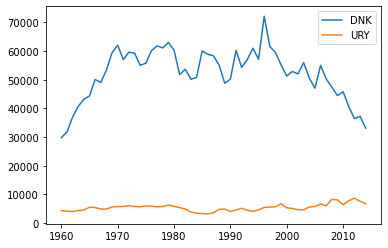

In [27]:
# CONCAT
ts = pd.concat([ts_dk, ts_ury], axis=1, keys=['DNK', 'URY']) # axis=0 is default (concats like sql UNION) axis=1 concats the data along the x axis
print(ts[:4])
ts.plot()

More information on `DataFrame`s can be found here:
http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe

Similar to, we can create `DataFrame`s by giving the data for the values and indexes explicitely.

In [28]:
dates = pd.date_range('20200602', periods=6) # create 6 dates from september 2nd, 2020.
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD')) # use np.random.randn to generate a dataframe of 6 by 4 random numbers
print(dates)
print(df)
#df.describe()

DatetimeIndex(['2020-06-02', '2020-06-03', '2020-06-04', '2020-06-05',
               '2020-06-06', '2020-06-07'],
              dtype='datetime64[ns]', freq='D')
                   A         B         C         D
2020-06-02  1.095538  0.353854 -0.560682  1.926903
2020-06-03  0.689461  1.419432 -0.022515 -1.843300
2020-06-04  0.009076 -0.472316 -0.820377  0.003827
2020-06-05  0.218293  1.625447  0.665865 -0.859383
2020-06-06  0.237297  0.817158 -0.325169 -0.551815
2020-06-07  0.903629  0.625407  1.006819  2.265407


In [29]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.525549,0.728164,-0.009343,0.156940
std,0.433345,0.759303,0.714166,1.620991
min,0.009076,-0.472316,-0.820377,-1.843300
25%,0.223044,0.421742,-0.501804,-0.782491
50%,0.463379,0.721282,-0.173842,-0.273994
75%,0.850087,1.268863,0.493770,1.446134
max,1.095538,1.625447,1.006819,2.265407


## 03 Exercise pandas dataframe
1. Using the dataframe in the above cell find:
    1. Mean, Min, Max values for all 4 columns
    2. The 2 dates with the largest and smallest sum (by column)
    3. All dates where both A's and B's are positive

## A few useful pandas methods
1. `df.set_index('Col name here')` set index of a data frame to be one of the columns (must be unique values)
2. `df.sort_values(ascending=False)`
3. `pd.read_csv('../../../data/country_codes.csv', sep='\t', header=None)` 
4. `df['col'].str.strip()` use ds.str.some_method to do string operations on all values in dataframe column (data series)
5. `data[data['Column Name'].isin(some_list)]` Filters all rows to only those where the value in specified column exists in a specified list
6. `filter = as_and_bs[as_and_bs > 0]` Create a filter where all non-validate values is replaced with NaN
7. `filter_na = filter.notna()` create a boolean mask to remove all NaN values
8. `filter_na.any(axis=1)` any() includes all rows where a single True is present
9. `filter_na.all(axis=1)` all() includes only those rows where all cells are True
10. `ds.replace(val1,val2)` replaces all instances of val1 with val2
11. `data[['col1','col2']].apply(pd.to_numeric)` convert all values of collumn 1 and 2 from string to numeric
12. `df['col 3'] = df['col1']/df['col2']` creates a new column in the data frame with the result of dividing each value in column 1 with the equivilent value in column 2
13. `df.groupby(['col1','col3']).sum().reset_index()`
14. `df[df['col name']==some_value]` filter rows based on value
15. merge
16. When data is on different is on different rows for same entity

In [2]:
# Base data frames
import pandas as pd
data_people = {'Name':['Henning', 'Hassan', 'Helle', 'Harissa'],'Age':[20, 21, 19, 18], 'Phone':[3,2,4,1]} 
data_phones = {'Id':[1,2,3,4],'Number':['+4598877665','+4523344556','+4543543456','+4539105843'],'Description':['Home','Work','Home','Mobile']}
df_people = pd.DataFrame(data_people)
df_phones = pd.DataFrame(data_phones)
df_people

,Name,Age,Phone
0,Henning,20,3
1,Hassan,21,2
2,Helle,19,4
3,Harissa,18,1


In [31]:
df_phones

,Id,Number,Description
0,1,+4598877665,Home
1,2,+4523344556,Work
2,3,+4543543456,Home
3,4,+4539105843,Mobile


In [6]:
# 1 set_index
df_phones_new = df_phones.set_index('Number')
df_phones_new

,Id,Description
Number,,
+4598877665,1,Home
+4523344556,2,Work
+4543543456,3,Home
+4539105843,4,Mobile


In [33]:
# after set_index, now we can find by number
df_phones_new.loc['+4523344556']

Id                2
Description    Work
Name: +4523344556, dtype: object

In [28]:
# reset the index
df_phones_old = df_phones_new.reset_index()
df_phones_old

,Number,Id,Description
0,+4598877665,1,Home
1,+4523344556,2,Work
2,+4543543456,3,Home
3,+4539105843,4,Mobile


In [34]:
# 2. sort
df_people_sorted = df_people.sort_values('Age',ascending=False)
df_people_sorted

,Name,Age,Phone
1,Hassan,21,2
0,Henning,20,3
2,Helle,19,4
3,Harissa,18,1


In [35]:
# 4. use DataSeries .str attribute to apply string methods to a column in a dataframe
df_people['Name'] = df_people['Name'].str.upper()
df_people

,Name,Age,Phone
0,HENNING,20,3
1,HASSAN,21,2
2,HELLE,19,4
3,HARISSA,18,1


In [3]:
# 5. isin() filters all rows based on whether value is in list
df_phones[df_phones['Number'].isin(['+4598877665','+4543543456'])]

,Id,Number,Description
0,1,+4598877665,Home
2,3,+4543543456,Home


In [8]:
df_phones
#df_phones[df_phones['Number'].isin(['+4598877665','+4543543456'])]
df_phones_new[df_phones_new.index.isin(['+4598877665','+4543543456'])]

,Id,Description
Number,,
+4598877665,1,Home
+4543543456,3,Home


In [36]:
# 6. filter
df_people_filtered = df_people[df_people['Age'] > 19]
df_people_filtered

,Name,Age,Phone
0,HENNING,20,3
1,HASSAN,21,2


In [39]:
# 11. apply()
age_phone = df_merged[['Age','Phone']].apply(pd.to_numeric)
age_phone

,Age,Phone
0,20,3
1,21,2
2,19,4
3,18,1


In [40]:
# 11. apply with lambda (axis=1 means rowwise, axis=0 is columnwise) a row is a dataseries and it has a sum method

df_merged['Summed'] = age_phone.apply(lambda row:row.sum(), axis=1)
df_merged

,Name,Age,Phone,Id,Number,Description,Summed
0,HENNING,20,3,3,+4543543456,Home,23
1,HASSAN,21,2,2,+4523344556,Work,23
2,HELLE,19,4,4,+4539105843,Mobile,23
3,HARISSA,18,1,1,+4598877665,Home,19


In [41]:
# 12. new column
df_merged['new column'] = df_merged['Age']/df_merged['Phone']*100
df_merged

,Name,Age,Phone,Id,Number,Description,Summed,new column
0,HENNING,20,3,3,+4543543456,Home,23,666.666667
1,HASSAN,21,2,2,+4523344556,Work,23,1050.000000
2,HELLE,19,4,4,+4539105843,Mobile,23,475.000000
3,HARISSA,18,1,1,+4598877665,Home,19,1800.000000


In [38]:
# 15. merged
df_merged = pd.merge(df_people, df_phones, left_on='Phone', right_on='Id')
df_merged

,Name,Age,Phone,Id,Number,Description
0,HENNING,20,3,3,+4543543456,Home
1,HASSAN,21,2,2,+4523344556,Work
2,HELLE,19,4,4,+4539105843,Mobile
3,HARISSA,18,1,1,+4598877665,Home


In [11]:
# 16. One way to use values on seperate rows
# Find average achivements pr. year
data_people = {'Name':['Henning', 'Henning', 'Harissa', 'Harissa'],'Age':[20, None, 19, None], 'Achievements':[None,40,None,35]} 
df = pd.DataFrame(data_people)
df

,Name,Age,Achievements
0,Henning,20.0,NaN
1,Henning,NaN,40.0
2,Harissa,19.0,NaN
3,Harissa,NaN,35.0


In [15]:
age = df[df['Age'].notnull()]
achieve = df[df['Achievements'].notnull()]
print(age)
average = age['Age']/achieve['Achievements'].tolist() # tolist() is used here because the rows of age and achieve are of different index (alternative: use .reset_index())
result = age.copy()
result['Result'] = average
result[['Name','Result']]

      Name   Age  Achievements
0  Henning  20.0           NaN
2  Harissa  19.0           NaN


,Name,Result
0,Henning,NaN
2,Harissa,NaN


In [44]:
# 12. groupby
people_account = {'Name':['Henning', 'Hassan', 'Helle', 'Harissa'],'Age':[20, 20, 19, 19], 'Account':[100,200,300,400]} 
df = pd.DataFrame(people_account)
print(df)
# group by age and sum up the Account column (reset index to get a new 0 indexed dataframe)
df.groupby('Age')['Account'].sum().reset_index()

      Name  Age  Account
0  Henning   20      100
1   Hassan   20      200
2    Helle   19      300
3  Harissa   19      400


,Age,Account
0,19,700
1,20,300


In [75]:
# boolean filtering example
mask = df_merged['Description'] == 'Home'
df_merged[mask]

,Name,Age,Phone,Id,Number,Description,Summed,new column
0,HENNING,20,3,3,+4543543456,Home,23,666.666667
3,HARISSA,18,1,1,+4598877665,Home,19,1800.000000


## Dataframe to Series and back
Using stack() and unstack() to change a dataframe into a Series and back. If Dataframe has 2 columns, the Series will get 2 (hieracical) indices

In [5]:
df

,Name,Age,Achievements
0,Henning,20.0,NaN
1,Henning,NaN,40.0
2,Harissa,19.0,NaN
3,Harissa,NaN,35.0


In [10]:
series = df.stack()
print(type(series))
print(series.index)
series

<class 'pandas.core.series.Series'>
MultiIndex([(0,         'Name'),
            (0,          'Age'),
            (1,         'Name'),
            (1, 'Achievements'),
            (2,         'Name'),
            (2,          'Age'),
            (3,         'Name'),
            (3, 'Achievements')],
           )


0  Name            Henning
   Age                  20
1  Name            Henning
   Achievements         40
2  Name            Harissa
   Age                  19
3  Name            Harissa
   Achievements         35
dtype: object

In [8]:
series.unstack()

,Name,Age,Achievements
0,Henning,20,NaN
1,Henning,NaN,40
2,Harissa,19,NaN
3,Harissa,NaN,35


## Working with real data
Since we do not want to work on random example data. We will have a look on the **military expenditures** of some countries in the world. We will use this data to exemplify usage of Pandas' `DataFrame` methods.

Again, we will receive the data from the World Bank.
http://data.worldbank.org/indicator/MS.MIL.XPND.CN?locations=DK-CN-US-RU

In [45]:
import requests

url = 'http://api.worldbank.org/v2/en/indicator/MS.MIL.XPND.CN'

response = requests.get(url, params={'downloadformat': 'csv'})
fname = response.headers['Content-Disposition'].split('=')[1]
print(response.headers)

if response.ok:  # status_code == 200:
    with open(fname, 'wb') as f:
        f.write(response.content)   

print('Downloaded',fname)
#print('Downloaded {}'.format(fname))

{'Date': 'Tue, 13 Apr 2021 09:24:01 GMT', 'Content-Type': 'application/zip', 'Content-Length': '42258', 'Connection': 'keep-alive', 'Set-Cookie': 'api_http.cookie=2f4d39862a2fa1b0b0b0c4ad37e6251a; Path=/, dataapi.cookie=853586186.20480.0000; path=/; Httponly, BIGipServerdataapi.sfarm=1604431882.20480.0000; path=/; Httponly, TS019266c8=017189f9478495f0b78d6952e81769d131ca08fce2095ce906611590e63c6df61fcbd3d0de8eb77cb0eb5a1a43c0020b7854dae32c1fef9a29ed588c5ac4711bbd6fa354ccfa5043f543e26a36be3546646a0d71a9; Path=/, TS019865bf=01689d38367e477895662e618c97cf5da4978e28d7508c844bade37d942e27ac1f21cb3bc0de3e4760f40ef126df262740bfe90c19579bf48a90dedc13c21420641b36fee407804789a31f4ecdfba4c4e96a475c34ec9b5809bc5a44469a8d8f20053d27bd; Path=/', 'Cache-Control': 'public, must-revalidate, max-age=1', 'Expires': 'Tue, 13 Apr 2021 09:24:02 GMT', 'Last-Modified': 'Tue, 13 Apr 2021 09:24:01 GMT', 'Content-Disposition': 'attachment; filename=API_MS.MIL.XPND.CN_DS2_en_csv_v2_2165628.zip', 'Request-Context':

In [46]:
import os
import zipfile

zipfile.ZipFile(fname, 'r').extractall('.')
os.remove(fname)

In [47]:
%%bash
ls -ltrh | tail

-rw-r--r--  1 jovyan users  48K Apr 10 10:10 11-0-Classification.ipynb
-rw-r--r--  1 jovyan  1000 525K Apr 10 10:51 10-2 Clustering Titanic example.ipynb
-rwxr-xr-x  1 jovyan  1000 876K Apr 10 11:31 10-1 Clustering With MeanShift.ipynb
-rw-rw-r--  1 jovyan  1000 1.4K Apr 10 13:27 00-Videos.ipynb
drwxrwxr-x 19 jovyan  1000 4.0K Apr 13 06:23 my_notebooks
-rwxr-xr-x  1 jovyan  1000  42K Apr 13 09:23 05-2 pandas.ipynb
drwxr-xr-x  4 jovyan  1000 4.0K Apr 13 09:23 data
-rw-r--r--  1 jovyan users 1.7K Apr 13 09:24 Metadata_Indicator_API_MS.MIL.XPND.CN_DS2_en_csv_v2_2165628.csv
-rw-r--r--  1 jovyan users  31K Apr 13 09:24 Metadata_Country_API_MS.MIL.XPND.CN_DS2_en_csv_v2_2165628.csv
-rw-r--r--  1 jovyan users 141K Apr 13 09:24 API_MS.MIL.XPND.CN_DS2_en_csv_v2_2165628.csv


In [48]:
%%bash
head ./data/Metadata_Indicator_API_MS.MIL.XPND.CN_DS2_en_csv_v2_898165.csv

﻿"INDICATOR_CODE","INDICATOR_NAME","SOURCE_NOTE","SOURCE_ORGANIZATION",
"MS.MIL.XPND.CN","Military expenditure (current LCU)","Military expenditures data from SIPRI are derived from the NATO definition, which includes all current and capital expenditures on the armed forces, including peacekeeping forces; defense ministries and other government agencies engaged in defense projects; paramilitary forces, if these are judged to be trained and equipped for military operations; and military space activities. Such expenditures include military and civil personnel, including retirement pensions of military personnel and social services for personnel; operation and maintenance; procurement; military research and development; and military aid (in the military expenditures of the donor country). Excluded are civil defense and current expenditures for previous military activities, such as for veterans' benefits, demobilization, conversion, and destruction of weapons. This definition cannot be app

Now, we use Pandas' `read_csv` function to read the downloaded CSV file directly. Note that we have to skip the first four rows as they do not contain data we are interested in, see keyword argument `skiprows=4`.

Reading the CSV file like this returns a `DataFrame` directly.

In [49]:
import pandas as pd
expenditure_csv = 'data/API_MS.MIL.XPND.CN_DS2_en_csv_v2_898165.csv'

expenditures = pd.read_csv(expenditure_csv, skiprows=4)
expenditures

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Aruba,ABW,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.523050e+10,1.214900e+10,1.202767e+10,1.535600e+10,1.219917e+10,1.261483e+10,1.302083e+10,1.431083e+10,NaN,NaN
2,Angola,AGO,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.418750e+11,3.956800e+11,5.878690e+11,6.730000e+11,4.332160e+11,4.523560e+11,5.081750e+11,5.012240e+11,NaN,NaN
3,Albania,ALB,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.987700e+10,1.982000e+10,1.902200e+10,1.878800e+10,1.667100e+10,1.625000e+10,1.719900e+10,1.949200e+10,NaN,NaN
4,Andorra,AND,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.666471e+07,3.377049e+07,3.660178e+07,4.038172e+07,4.507072e+07,4.696200e+07,5.103600e+07,5.366700e+07,NaN,NaN
260,"Yemen, Rep.",YEM,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.447000e+11,3.470000e+11,3.543000e+11,3.685000e+11,NaN,NaN,NaN,NaN,NaN,NaN
261,South Africa,ZAF,Military expenditure (current LCU),MS.MIL.XPND.CN,50000000.0,81250000.0,133000000.0,135000000.0,194000000.0,206750000.0,...,3.335875e+10,3.685940e+10,3.976155e+10,4.224380e+10,4.451422e+10,4.666570e+10,4.854898e+10,4.821218e+10,NaN,NaN
262,Zambia,ZMB,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.502500e+09,1.782500e+09,2.057700e+09,2.729418e+09,3.215100e+09,3.088700e+09,3.204640e+09,3.955630e+09,NaN,NaN


## Viewing Data

In [50]:
expenditures.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Aruba,ABW,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.523050e+10,1.214900e+10,1.202767e+10,1.535600e+10,1.219917e+10,1.261483e+10,1.302083e+10,1.431083e+10,NaN,NaN
2,Angola,AGO,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.418750e+11,3.956800e+11,5.878690e+11,6.730000e+11,4.332160e+11,4.523560e+11,5.081750e+11,5.012240e+11,NaN,NaN
3,Albania,ALB,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.987700e+10,1.982000e+10,1.902200e+10,1.878800e+10,1.667100e+10,1.625000e+10,1.719900e+10,1.949200e+10,NaN,NaN
4,Andorra,AND,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
expenditures.tail()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
259,Kosovo,XKX,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.666471e+07,3.377049e+07,3.660178e+07,4.038172e+07,4.507072e+07,4.696200e+07,5.103600e+07,5.366700e+07,NaN,NaN
260,"Yemen, Rep.",YEM,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.447000e+11,3.470000e+11,3.543000e+11,3.685000e+11,NaN,NaN,NaN,NaN,NaN,NaN
261,South Africa,ZAF,Military expenditure (current LCU),MS.MIL.XPND.CN,50000000.0,81250000.0,133000000.0,135000000.0,194000000.0,206750000.0,...,3.335875e+10,3.685940e+10,3.976155e+10,4.224380e+10,4.451422e+10,4.666570e+10,4.854898e+10,4.821218e+10,NaN,NaN
262,Zambia,ZMB,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.502500e+09,1.782500e+09,2.057700e+09,2.729418e+09,3.215100e+09,3.088700e+09,3.204640e+09,3.955630e+09,NaN,NaN
263,Zimbabwe,ZWE,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,15600000.0,...,1.984380e+08,3.182720e+08,3.567000e+08,3.681000e+08,3.766770e+08,3.580650e+08,3.405220e+08,4.203640e+08,NaN,NaN


In [52]:
expenditures.index

RangeIndex(start=0, stop=264, step=1)

In [53]:
expenditures.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', 'Unnamed: 64'],
      dtype='object')

In [54]:
expenditures.values

array([['Aruba', 'ABW', 'Military expenditure (current LCU)', ..., nan,
        nan, nan],
       ['Afghanistan', 'AFG', 'Military expenditure (current LCU)', ...,
        14310833333.3333, nan, nan],
       ['Angola', 'AGO', 'Military expenditure (current LCU)', ...,
        501224000000.0, nan, nan],
       ...,
       ['South Africa', 'ZAF', 'Military expenditure (current LCU)', ...,
        48212175000.0, nan, nan],
       ['Zambia', 'ZMB', 'Military expenditure (current LCU)', ...,
        3955630000.0, nan, nan],
       ['Zimbabwe', 'ZWE', 'Military expenditure (current LCU)', ...,
        420364000.0, nan, nan]], dtype=object)

## Selection of Data in a `DataFrame`

### Selection by Column Name


In [55]:
len(list(expenditures['Country Name']))

264

In [56]:
list(expenditures['Country Code'])

['ABW',
 'AFG',
 'AGO',
 'ALB',
 'AND',
 'ARB',
 'ARE',
 'ARG',
 'ARM',
 'ASM',
 'ATG',
 'AUS',
 'AUT',
 'AZE',
 'BDI',
 'BEL',
 'BEN',
 'BFA',
 'BGD',
 'BGR',
 'BHR',
 'BHS',
 'BIH',
 'BLR',
 'BLZ',
 'BMU',
 'BOL',
 'BRA',
 'BRB',
 'BRN',
 'BTN',
 'BWA',
 'CAF',
 'CAN',
 'CEB',
 'CHE',
 'CHI',
 'CHL',
 'CHN',
 'CIV',
 'CMR',
 'COD',
 'COG',
 'COL',
 'COM',
 'CPV',
 'CRI',
 'CSS',
 'CUB',
 'CUW',
 'CYM',
 'CYP',
 'CZE',
 'DEU',
 'DJI',
 'DMA',
 'DNK',
 'DOM',
 'DZA',
 'EAP',
 'EAR',
 'EAS',
 'ECA',
 'ECS',
 'ECU',
 'EGY',
 'EMU',
 'ERI',
 'ESP',
 'EST',
 'ETH',
 'EUU',
 'FCS',
 'FIN',
 'FJI',
 'FRA',
 'FRO',
 'FSM',
 'GAB',
 'GBR',
 'GEO',
 'GHA',
 'GIB',
 'GIN',
 'GMB',
 'GNB',
 'GNQ',
 'GRC',
 'GRD',
 'GRL',
 'GTM',
 'GUM',
 'GUY',
 'HIC',
 'HKG',
 'HND',
 'HPC',
 'HRV',
 'HTI',
 'HUN',
 'IBD',
 'IBT',
 'IDA',
 'IDB',
 'IDN',
 'IDX',
 'IMN',
 'IND',
 'INX',
 'IRL',
 'IRN',
 'IRQ',
 'ISL',
 'ISR',
 'ITA',
 'JAM',
 'JOR',
 'JPN',
 'KAZ',
 'KEN',
 'KGZ',
 'KHM',
 'KIR',
 'KNA',
 'KOR',


### Selection by Indexes

In the following we index the third row directly.

In [57]:
# get row 3
albania = expenditures.iloc[3]
print(albania)

Country Name                                 Albania
Country Code                                     ALB
Indicator Name    Military expenditure (current LCU)
Indicator Code                        MS.MIL.XPND.CN
1960                                             NaN
                                 ...                
2016                                       1.625e+10
2017                                      1.7199e+10
2018                                      1.9492e+10
2019                                             NaN
Unnamed: 64                                      NaN
Name: 3, Length: 65, dtype: object


In [58]:
# using .loc to extract by label (row or column)
expenditures.loc[3]

Country Name                                 Albania
Country Code                                     ALB
Indicator Name    Military expenditure (current LCU)
Indicator Code                        MS.MIL.XPND.CN
1960                                             NaN
                                 ...                
2016                                       1.625e+10
2017                                      1.7199e+10
2018                                      1.9492e+10
2019                                             NaN
Unnamed: 64                                      NaN
Name: 3, Length: 65, dtype: object

In [59]:
expenditures.iloc[3:5]

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
3,Albania,ALB,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.987700e+10,1.982000e+10,1.902200e+10,1.878800e+10,1.667100e+10,1.625000e+10,1.719900e+10,1.949200e+10,NaN,NaN
4,Andorra,AND,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
# extract sub set of [rows,columns]
expenditures.iloc[3:5, 4:]

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.987700e+10,1.982000e+10,1.902200e+10,1.878800e+10,1.667100e+10,1.625000e+10,1.719900e+10,1.949200e+10,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Boolean Indexing

Similar to NumPy, you can use boolean arrays for indexing. That is, you can use boolean expressions directly for indexing.

In the following we assign `expenditures` to `df`as the latter is shorter.

In [61]:
df = expenditures

Using the `isin()` method for filtering:

In [62]:
df[df['Country Name'].isin(['United States', 'China', 'Denmark', 'Russian Federation'])]

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
38,China,CHN,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.914702e+11,9.935000e+11,1.114496e+12,1.233430e+12,1.333262e+12,1.436617e+12,1.541448e+12,1.654051e+12,NaN,NaN
56,Denmark,DNK,Military expenditure (current LCU),MS.MIL.XPND.CN,1.113000e+09,1.180000e+09,1.551000e+09,1.651000e+09,1.764000e+09,1.974000e+09,...,2.425900e+10,2.561700e+10,2.368200e+10,2.276900e+10,2.263300e+10,2.419000e+10,2.496100e+10,2.670000e+10,NaN,NaN
200,Russian Federation,RUS,Military expenditure (current LCU),MS.MIL.XPND.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.063740e+12,2.512500e+12,2.812900e+12,3.250500e+12,4.047400e+12,4.644800e+12,3.879916e+12,3.849569e+12,NaN,NaN
249,United States,USA,Military expenditure (current LCU),MS.MIL.XPND.CN,4.538000e+10,4.780800e+10,5.238100e+10,5.229500e+10,5.121300e+10,5.182700e+10,...,7.113380e+11,6.847800e+11,6.397040e+11,6.099140e+11,5.961046e+11,6.001064e+11,6.058029e+11,6.487983e+11,NaN,NaN


Here, we create a `DataFrame` of all country codes for the four countries, which we want to study further in the following.

In [63]:
# get indices for the 4 countries in question:
c_codes = df[df['Country Name'].isin(['United States', 'China', 
                                        'Denmark', 'Russian Federation'])]['Country Code']
c_codes

38     CHN
56     DNK
200    RUS
249    USA
Name: Country Code, dtype: object

We cannot plot the time series of military expenditures directly in a meaningful way as we would like to have the years on the y-axis but in the selection of our `DataFrame`, the year numbers are column names. Consequently, we have to transpose our `DataFrame`, see `T` function.

Note, that the expenditures are given in `LUC` in the World Bank data set. That is, in currency of the corresponding country.

             1987          1988          1989          1990          1991  \
38            NaN           NaN  4.293526e+10  4.823906e+10  5.298712e+10   
56   1.464700e+10  1.562000e+10  1.596300e+10  1.639900e+10  1.709100e+10   
200           NaN           NaN           NaN           NaN           NaN   
249  2.881570e+11  2.930930e+11  3.040850e+11  3.061700e+11  2.802920e+11   

             1992          1993          1994          1995          1996  \
38   6.849287e+10  7.246913e+10  8.662339e+10  1.052799e+11  1.210814e+11   
56   1.712900e+10  1.739000e+10  1.729300e+10  1.746800e+10  1.789600e+10   
200  9.040000e+08  7.702000e+09  2.968000e+10  5.809100e+10  8.104400e+10   
249  3.051410e+11  2.976370e+11  2.880590e+11  2.788560e+11  2.714170e+11   

     ...          2010          2011          2012          2013  \
38   ...  7.834000e+11  8.914702e+11  9.935000e+11  1.114496e+12   
56   ...  2.532800e+10  2.425900e+10  2.561700e+10  2.368200e+10   
200  ...  1.783210e+12  

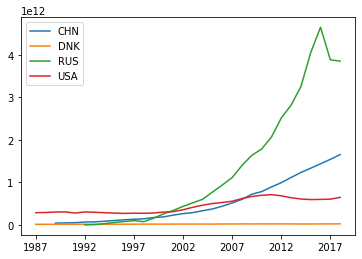

In [64]:
import matplotlib.pyplot as plt

# get only the 4 countries from df and only cols: 31-end (only 1987 and up)
#print(df.iloc[c_code_df.index,31:-1])
ts_df = df.iloc[c_codes.index, 31:-1]
print(ts_df)
ts_df = ts_df.T
print(ts_df)
ts_df = ts_df.rename(columns=dict(c_codes))
print(ts_df)
ts_df
ts_df.plot()

Since this plot may be a bit misleading, we will 'normalize' all expeditures to Euro, so that they are better comparible.

In [65]:
import requests


# http://www.ecb.europa.eu/stats/policy_and_exchange_rates/euro_reference_exchange_rates/html/index.en.html#dev
response = requests.get('http://www.ecb.europa.eu/stats/eurofxref/eurofxref-daily.xml')
response.text

'<?xml version="1.0" encoding="UTF-8"?>\n<gesmes:Envelope xmlns:gesmes="http://www.gesmes.org/xml/2002-08-01" xmlns="http://www.ecb.int/vocabulary/2002-08-01/eurofxref">\n\t<gesmes:subject>Reference rates</gesmes:subject>\n\t<gesmes:Sender>\n\t\t<gesmes:name>European Central Bank</gesmes:name>\n\t</gesmes:Sender>\n\t<Cube>\n\t\t<Cube time=\'2021-04-12\'>\n\t\t\t<Cube currency=\'USD\' rate=\'1.1904\'/>\n\t\t\t<Cube currency=\'JPY\' rate=\'130.20\'/>\n\t\t\t<Cube currency=\'BGN\' rate=\'1.9558\'/>\n\t\t\t<Cube currency=\'CZK\' rate=\'26.031\'/>\n\t\t\t<Cube currency=\'DKK\' rate=\'7.4369\'/>\n\t\t\t<Cube currency=\'GBP\' rate=\'0.86518\'/>\n\t\t\t<Cube currency=\'HUF\' rate=\'356.43\'/>\n\t\t\t<Cube currency=\'PLN\' rate=\'4.5246\'/>\n\t\t\t<Cube currency=\'RON\' rate=\'4.9203\'/>\n\t\t\t<Cube currency=\'SEK\' rate=\'10.1975\'/>\n\t\t\t<Cube currency=\'CHF\' rate=\'1.0998\'/>\n\t\t\t<Cube currency=\'ISK\' rate=\'151.90\'/>\n\t\t\t<Cube currency=\'NOK\' rate=\'10.0940\'/>\n\t\t\t<Cube cur

In [66]:
from bs4 import BeautifulSoup
# Will be covered in week 7 on webscraping

xml = BeautifulSoup(response.text, 'html.parser')
rate_list = xml.cube.cube.findAll("cube") # [0]['rate']
print(xml.cube)

<cube>
<cube time="2021-04-12">
<cube currency="USD" rate="1.1904"></cube>
<cube currency="JPY" rate="130.20"></cube>
<cube currency="BGN" rate="1.9558"></cube>
<cube currency="CZK" rate="26.031"></cube>
<cube currency="DKK" rate="7.4369"></cube>
<cube currency="GBP" rate="0.86518"></cube>
<cube currency="HUF" rate="356.43"></cube>
<cube currency="PLN" rate="4.5246"></cube>
<cube currency="RON" rate="4.9203"></cube>
<cube currency="SEK" rate="10.1975"></cube>
<cube currency="CHF" rate="1.0998"></cube>
<cube currency="ISK" rate="151.90"></cube>
<cube currency="NOK" rate="10.0940"></cube>
<cube currency="HRK" rate="7.5673"></cube>
<cube currency="RUB" rate="91.9588"></cube>
<cube currency="TRY" rate="9.7038"></cube>
<cube currency="AUD" rate="1.5613"></cube>
<cube currency="BRL" rate="6.7460"></cube>
<cube currency="CAD" rate="1.4931"></cube>
<cube currency="CNY" rate="7.7907"></cube>
<cube currency="HKD" rate="9.2564"></cube>
<cube currency="IDR" rate="17391.62"></cube>
<cube currency="

In [67]:


currency = ['USD', 'DKK', 'RUB', 'CNY']
rate_dict = dict.fromkeys(currency) # create a new dict with given keys
#print(rate_dict)
for element in rate_list:
    if element['currency'] in currency:
        rate_dict[element['currency']] = float(element['rate'])
        print(element['rate'])
rate_dict

1.1904
7.4369
91.9588
7.7907


{'USD': 1.1904, 'DKK': 7.4369, 'RUB': 91.9588, 'CNY': 7.7907}

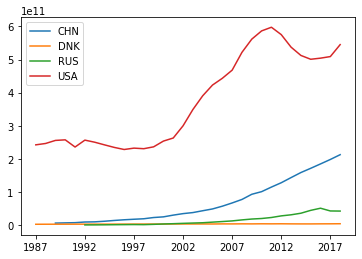

In [68]:
# get all weapons expenditure in euros
ts_df['DNK'] = ts_df['DNK'] / rate_dict['DKK']
ts_df['USA'] = ts_df['USA'] / rate_dict['USD']
ts_df['CHN'] = ts_df['CHN'] / rate_dict['CNY']
ts_df['RUS'] = ts_df['RUS'] / rate_dict['RUB']
ts_df.plot()

**OBS!!!** Be careful, the graph above is still not really well suited for comparison as currency exchange rates are not fix. However, the code above normalizes just relying on the most current exchange rate from the European Central Bank. See the exercise block in the bottom for how to fix that isuue!

## Sorting dataframes

In case you have to sort the data in your `DataFrames` see the methods `sort_index` and `sort_values`.


```python
df.sort_index(axis=1, ascending=True)
df.sort_values(by='Country Code')
```

In [69]:
df.sort_index?

In [70]:
df.sort_values?

## 04 Class Exercise
#### Find military expenditure pr. capita.

Go here and get data as csv: [worldbank military expanditure](https://databank.worldbank.org/reports.aspx?source=2&series=MS.MIL.XPND.CD&country=#). Download it manually, unzip the csv and clean up empty rows.  
1. Use .replace() method on the dataframe to remove all data containing '..'
2. Set index of the dataframe to be 'Country Name'
3. Slice the 2019 column data to get a data series.
4. Make data numeric (pd.to_numeric(data_series))

1. For 2019 find the 10 countries with the highest military expenditure in USD
2. For 2019 find the 10 countries with the highest military expenditure per capita. Find the population data here: [worldbank](https://databank.worldbank.org/source/world-development-indicators/preview/on#)(use series='Population,Total' and time='2019' and Country= countries (217)) **or** use [copy paste with this date into excel](https://www.worldometers.info/world-population/population-by-country/)
  - (Hint: use pd.merge() to merge the mil_exp dataframe with the population dataframe on 2 columns (country_code)
3. For 2019 find the 3 countries with the highest per capita military expenditure in the middle east
  - [countries list with iso code](middleeast_countries.csv) or use:   
  `list_of_middle_eastern = ['YEM','ARE','TUR','SYR','SAU','QAT','PSE','OMN','LBN','KWT','JOR','ISR','IRQ','IRN','EGY','CYP','BHR']`


## Self study exercise

Complete the comparison of military expenditures by converting all currencies to USD. Since we have yearly expenditures, use for example the yearly median for normalization. Likely, you will find an API to collect historical echange rates at Yahoo Finance.

[https://finance.yahoo.com/quote/USDRUB%3DX](https://finance.yahoo.com/quote/USDRUB%3DX)





In [71]:
pd.read_csv('https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&OMR%C3%85DE=*&K%C3%98N=*&ALDER=IALT&CIVILSTAND=TOT',sep=';')

,OMRÅDE,KØN,ALDER,CIVILSTAND,TID,INDHOLD
0,Hele landet,I alt,I alt,I alt,2021K1,5840045
1,Hele landet,Mænd,I alt,I alt,2021K1,2904857
2,Hele landet,Kvinder,I alt,I alt,2021K1,2935188
3,Region Hovedstaden,I alt,I alt,I alt,2021K1,1855084
4,Region Hovedstaden,Mænd,I alt,I alt,2021K1,910720
...,...,...,...,...,...,...
310,Vesthimmerlands,Mænd,I alt,I alt,2021K1,18455
311,Vesthimmerlands,Kvinder,I alt,I alt,2021K1,17907
312,Aalborg,I alt,I alt,I alt,2021K1,219487
313,Aalborg,Mænd,I alt,I alt,2021K1,110644


## Plotting bar chart
```python

df = pd.DataFrame(np.random.rand(6, 4),
     index=['one', 'two', 'three', 'four', 'five', 'six'],
     columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df.plot.bar()
```


Genus,A,B,C,D
one,0.852341,0.346661,0.163713,0.313578
two,0.060197,0.296647,0.272166,0.066095
three,0.349451,0.071270,0.915338,0.416768
four,0.278722,0.033345,0.214349,0.787561
five,0.838853,0.644050,0.034353,0.577494
six,0.630818,0.136586,0.729092,0.338132


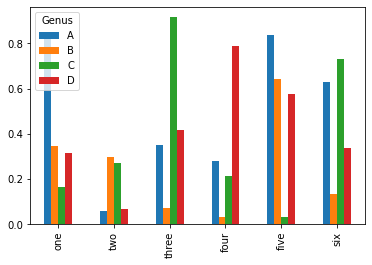

In [19]:
import numpy as np
df = pd.DataFrame(np.random.rand(6, 4),
     index=['one', 'two', 'three', 'four', 'five', 'six'],
     columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df.plot.bar()
df

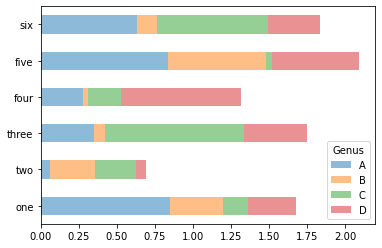

In [20]:
df.plot.barh(stacked=True, alpha=0.5)

## Group by

In [23]:
 df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
     'key2' : ['one', 'two', 'one', 'two', 'one'],
     'data1' : np.random.randn(5),
     'data2' : np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,0.604573,-0.518442
1,a,two,-0.247900,-0.269884
2,b,one,-0.569041,0.074058
3,b,two,0.481577,0.537882
4,a,one,-0.164286,0.109580


In [28]:
grouped = df['data1'].groupby(df['key1'])
grouped2 = df['data1'].groupby([df['key1'], df['key2']])
grouped

In [35]:
print('mean:\n',grouped.mean())
print('max:\n',grouped.max())
print('sum:\n',grouped.sum())
print()
print('grouped2:\n ', grouped2.sum()) # creates a hierachical indexed series
print('indices:\n',grouped2.sum().index)

mean:
 key1
a    0.064129
b   -0.043732
Name: data1, dtype: float64
max:
 key1
a    0.604573
b    0.481577
Name: data1, dtype: float64
sum:
 key1
a    0.192388
b   -0.087464
Name: data1, dtype: float64

grouped2:
  key1  key2
a     one     0.440288
      two    -0.247900
b     one    -0.569041
      two     0.481577
Name: data1, dtype: float64
indices:
 MultiIndex([('a', 'one'),
            ('a', 'two'),
            ('b', 'one'),
            ('b', 'two')],
           names=['key1', 'key2'])


## Grouping with dict and series


In [36]:
people = pd.DataFrame(np.random.randn(5, 5),
columns=['a', 'b', 'c', 'd', 'e'],
index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])
people.iloc[2:3, [1, 2]] = np.nan # Add a few NA values
people

,a,b,c,d,e
Joe,0.085893,0.947133,0.434333,2.035700,1.763572
Steve,-0.515601,-1.140845,0.127952,-0.237970,0.302721
Wes,0.425012,NaN,NaN,-0.790609,1.030283
Jim,1.333927,-0.152254,0.042762,0.087817,0.630631
Travis,-0.227474,-0.857234,0.638415,-1.415665,1.472007


In [38]:
# its ok to have extra (unused) keys in the dict like 'f' below:
mapping = {'a': 'red', 'b': 'red', 'c': 'blue', 'd': 'blue', 'e': 'red', 'f' : 'orange'}
by_column = people.groupby(mapping, axis=1)
by_column.sum()

,blue,red
Joe,2.470033,2.796597
Steve,-0.110018,-1.353725
Wes,-0.790609,1.455296
Jim,0.130579,1.812304
Travis,-0.777250,0.387299


## Grouping with functions

In [39]:
#group by the result of the len() function
people.groupby(len).sum()

,a,b,c,d,e
3,1.844832,0.794879,0.477095,1.332908,3.424486
5,-0.515601,-1.140845,0.127952,-0.237970,0.302721
6,-0.227474,-0.857234,0.638415,-1.415665,1.472007


In [40]:
# Mixing functions with arrays, dicts, or Series is not a problem as everything gets converted to arrays internally
key_list = ['one', 'one', 'one', 'two', 'two']
people.groupby([len, key_list]).min()

a         b         c         d         e
3 one  0.085893  0.947133  0.434333 -0.790609  1.030283
  two  1.333927 -0.152254  0.042762  0.087817  0.630631
5 one -0.515601 -1.140845  0.127952 -0.237970  0.302721
6 two -0.227474 -0.857234  0.638415 -1.415665  1.472007